In [1]:
import pandas as pd
import preprocessing

In [2]:
test_data = pd.read_csv('./data/test_set_VU_DM.csv')
print(test_data.describe())
nan_data_info = pd.DataFrame({'NaN Count': test_data.isna().sum(), 'Data Type': test_data.dtypes})
print(nan_data_info)

            srch_id       site_id  visitor_location_country_id  \
count  4.959183e+06  4.959183e+06                 4.959183e+06   
mean   1.666460e+05  9.979214e+00                 1.752504e+02   
std    9.614992e+04  7.667722e+00                 6.590284e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    8.331150e+04  5.000000e+00                 1.000000e+02   
50%    1.670950e+05  5.000000e+00                 2.190000e+02   
75%    2.499660e+05  1.400000e+01                 2.190000e+02   
max    3.327870e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            253431.000000         254624.000000     4.959183e+06   
mean                  3.374933            177.150730     1.738371e+02   
std                   0.691920            109.592336     6.835006e+01   
min                   1.000000              0.000000     1.000000e+00   
25%                   2.930000          

In [3]:
print(test_data.prop_review_score.isnull().sum())
preprocessing.fill_by_regressor(test_data, regressor='ridge', feature_columns=['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price'], target_column='prop_review_score')
print(test_data.prop_review_score.isnull().sum())

print(test_data.prop_location_score2.isnull().sum())
preprocessing.fill_by_regressor(test_data, regressor='ridge', feature_columns=['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price'], target_column='prop_location_score2')
print(test_data.prop_location_score2.isnull().sum())

preprocessing.preprocess_null_fill(test_data, columns=['srch_query_affinity_score'], fill_value=-650)
preprocessing.parse_date(test_data)

drop_columns = ['date_time', 'orig_destination_distance']
data_filled = test_data.drop(columns=drop_columns)

preprocessing.merge_comp(data_filled)
preprocessing.preprocess_null_fill_mean(data_filled)

7266
Score: [-0.62699879 -0.62735628 -0.6252084 ]
Mean score -0.6265211561322955
0
1088032
Score: [-0.10109755 -0.10110291 -0.10086015]
Mean score -0.10102020371723874
0


In [4]:
nan_data_info = pd.DataFrame({'NaN Count': data_filled.isna().sum(), 'Data Type': data_filled.dtypes})
print(nan_data_info)

                             NaN Count Data Type
srch_id                              0   float64
site_id                              0   float64
visitor_location_country_id          0   float64
visitor_hist_starrating              0   float64
visitor_hist_adr_usd                 0   float64
prop_country_id                      0   float64
prop_id                              0   float64
prop_starrating                      0   float64
prop_review_score                    0   float64
prop_brand_bool                      0   float64
prop_location_score1                 0   float64
prop_location_score2                 0   float64
prop_log_historical_price            0   float64
price_usd                            0   float64
promotion_flag                       0   float64
srch_destination_id                  0   float64
srch_length_of_stay                  0   float64
srch_booking_window                  0   float64
srch_adults_count                    0   float64
srch_children_count 

In [5]:
data_filled.to_csv('./data/filled_test_set.csv', index=False)

In [7]:
# test_data = pd.read_csv('./data/filled_test_set.csv')
remain_features = ['prop_starrating', 'prop_review_score', 'prop_location_score2', 'promotion_flag']+['srch_id', 'prop_id']
data_filled = test_data[remain_features]

In [7]:
print(len(test_data))

4959183


In [8]:
import joblib

model = joblib.load('models/Ridge_2024-05-10.pkl')

prediction = model.predict(data_filled)
print(prediction)

[13.80825143 14.43067975 11.11895621 ...  6.3710937   7.43296163
 12.81234638]


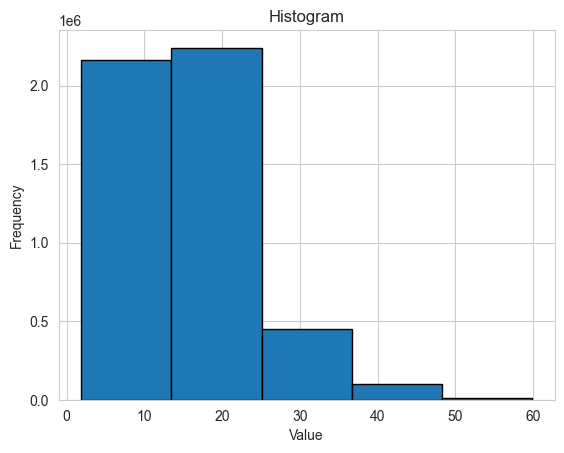

In [9]:
from matplotlib import pyplot as plt

plt.hist(prediction, bins=5, edgecolor='black')  # 设置直方柱的数量为5，边缘颜色为黑色
plt.xlabel('Value')  # 设置x轴标签
plt.ylabel('Frequency')  # 设置y轴标签
plt.title('Histogram')  # 设置标题
plt.grid(True)  # 添加网格线
plt.show()

In [10]:
# label = test_data.score

result = test_data[['srch_id', 'prop_id']]
result['score'] = prediction
# result['label'] = label
result['rank'] = result.groupby('srch_id')['score'].rank(ascending=False) 
print(result)

sorted_df = result.sort_values(by=['srch_id', 'score'], ascending=[True, False])

# 输出sid和pid
output = sorted_df[['srch_id', 'prop_id']]
output = output.astype(int)
print(output)
output.to_csv('./data/output.csv', index=False)

C:\Users\china\AppData\Local\Temp\ipykernel_10140\118898769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['score'] = prediction
C:\Users\china\AppData\Local\Temp\ipykernel_10140\118898769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['rank'] = result.groupby('srch_id')['score'].rank(ascending=False)


         srch_id  prop_id      score  rank
0              1     3180  13.808251  20.0
1              1     5543  14.430680  19.0
2              1    14142  11.118956  26.0
3              1    22393  13.254498  22.0
4              1    24194  19.537790   8.0
...          ...      ...        ...   ...
4959178   332787    32019  12.001281   5.0
4959179   332787    33959  22.615221   1.0
4959180   332787    35240   6.371094   7.0
4959181   332787    94437   7.432962   6.0
4959182   332787    99509  12.812346   4.0

[4959183 rows x 4 columns]
         srch_id  prop_id
12             1    61934
23             1    99484
9              1    54937
21             1    94729
24             1   123675
...          ...      ...
4959177   332787    29018
4959182   332787    99509
4959178   332787    32019
4959181   332787    94437
4959180   332787    35240

[4959183 rows x 2 columns]
